In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
DATASET_PATH = r"C:\Users\Usuario\.cache\kagglehub\datasets\philosopher0808\real-vs-ai-generated-faces-dataset\versions\1\dataset\dataset"


In [3]:
# IMG_SIZE = 224
# BATCH_SIZE = 16
# NUM_CLASSES = 2
# EPOCHS = 30
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2



In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/validate",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 72574 images belonging to 2 classes.
Found 24190 images belonging to 2 classes.
Found 24190 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


In [8]:
# history = model.fit(
#     train_generator,
#     epochs=EPOCHS,
#     validation_data=val_generator,
#     verbose=1
# )
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    steps_per_epoch=6,
    validation_steps=3
)



Epoch 1/50
6/6 [==============================] - 4s 484ms/step - loss: 1.2196 - accuracy: 0.4740 - val_loss: 0.6672 - val_accuracy: 0.6042
Epoch 2/50
6/6 [==============================] - 2s 314ms/step - loss: 0.6968 - accuracy: 0.5833 - val_loss: 0.7950 - val_accuracy: 0.5104
Epoch 3/50
6/6 [==============================] - 2s 357ms/step - loss: 0.6839 - accuracy: 0.5885 - val_loss: 0.7045 - val_accuracy: 0.5104
Epoch 4/50
6/6 [==============================] - 3s 501ms/step - loss: 0.6853 - accuracy: 0.5625 - val_loss: 0.6745 - val_accuracy: 0.5729
Epoch 5/50
6/6 [==============================] - 2s 339ms/step - loss: 0.6879 - accuracy: 0.5365 - val_loss: 0.6622 - val_accuracy: 0.5938
Epoch 6/50
6/6 [==============================] - 3s 447ms/step - loss: 0.6840 - accuracy: 0.5312 - val_loss: 0.6867 - val_accuracy: 0.5417
Epoch 7/50
6/6 [==============================] - 2s 331ms/step - loss: 0.6628 - accuracy: 0.6042 - val_loss: 0.6794 - val_accuracy: 0.6250
Epoch 8/50
6/6 [====

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


756/756 [==============================] - 97s 129ms/step - loss: 0.7798 - accuracy: 0.6096
Test loss: 0.7797945737838745
Test accuracy: 0.6096320748329163


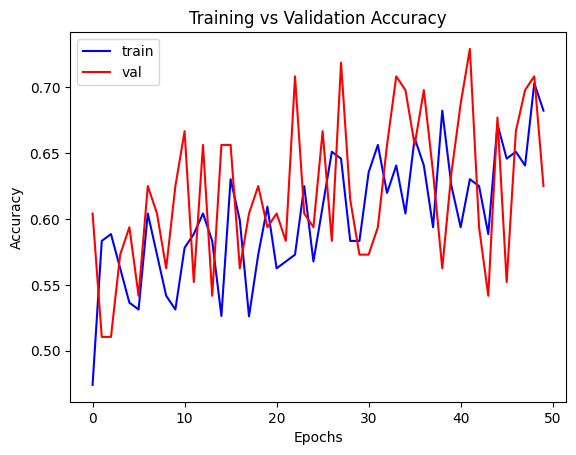

In [10]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.legend(['train', 'val'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()


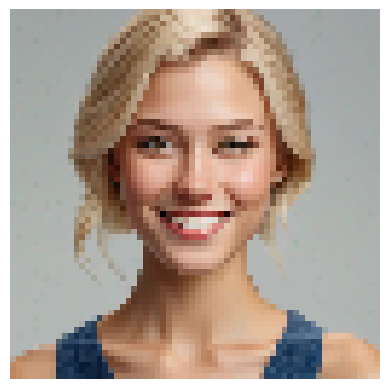

1/1 [==============================] - 0s 424ms/step
Raw prediction: [[0.39566785 0.60433215]]


In [11]:
from tensorflow.keras.preprocessing import image


# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA1.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

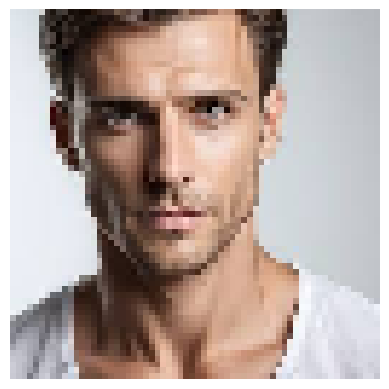

1/1 [==============================] - 0s 155ms/step
Raw prediction: [[0.8298314  0.17016856]]


In [12]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA2.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

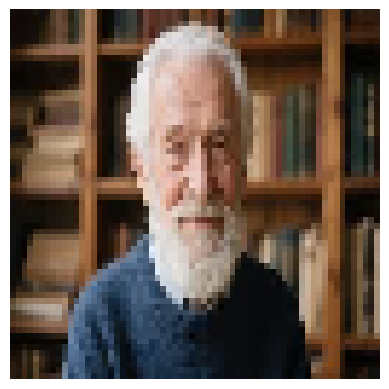

1/1 [==============================] - 0s 93ms/step
Raw prediction: [[0.9127519  0.08724815]]


In [13]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA3.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)

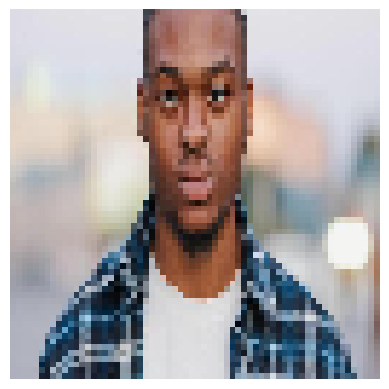

1/1 [==============================] - 0s 27ms/step
Raw prediction: [[0.9411736  0.05882638]]


In [14]:
# Ruta de la imagen nueva
img_path = r"C:\Users\Usuario\Downloads\IA4.jpg"  
 # <-- cambia esto

# Cargar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))

# Convertir a array
img_array = image.img_to_array(img)

# Normalizar (igual que entrenamiento)
img_array = img_array / 255.0

# Añadir dimensión batch
img_array = np.expand_dims(img_array, axis=0)

# Mostrar imagen
plt.imshow(img)
plt.axis("off")
plt.show()

prediction = model.predict(img_array)

print("Raw prediction:", prediction)